In [1]:
%matplotlib inline

Ver [A Tutorial on Spectral Clustering](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=6629222D66E44A7293624CBC1E5A4E84?doi=10.1.1.165.9323&rep=rep1&type=pdf) para una descripción detallada de Spectral Clustering.



Existen muchos algoritmos de clustering, algunos de los más comunes son el $k$-means y el algoritmo EM para GMM. Sin embargo estos dos algoritmos presentan los siguientes problemas:

1) Suponen la forma de los clusters (que están alrededor de una hiperelipse, una función de base radial).
2) Requieren ser ejecutados varias veces para determinar la mejor solución.

El Spectral clustering ayuda a resolver estos dos problemas, es una combinación de los métodos de clustering con las técnicas de reducción de dimensión (manifold learning), por lo que evita la necesidad de asumir una forma de hiperelipse en los clusters. 

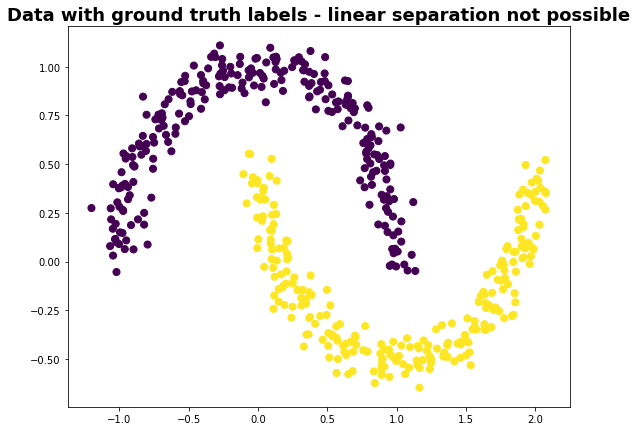

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(500, noise=.07, random_state=random_state)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

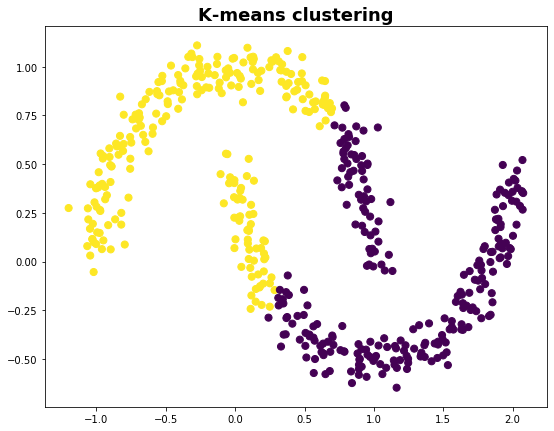

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=2, n_init=1)
kmeans.fit(X_mn)
Y2 = kmeans.predict(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('K-means clustering', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=Y2,s=dot_size, cmap=cmap)

Las etapas del Spectral Clustering son:

1) Construye un grafo $G=(V,E)$ donde los vértices $v_i$ son las puntos $x_i$ y los bordes son pesos directamente proporcionales a la similitud entre puntos. Dos puntos están conectados si su similitud es superior a un umbral.
2) El problema se reformula como encontrar una partición del grafo de tal manera que los bordes entre diferentes grupos tengan pesos bajos, y dentro de un cluster tengan pesos altos.
3) La matrix de adyacencia será entonces ${\bf{W}} = (W_ij),\; i,j=1,...,n$. Definimos el grado de un vértice $v_i \in V$ como:

$$d_i = \sum_{j=1}^n w_{ij}$$

A partir de esta se crea la matriz de grado $D$, que es una matrix diagonal que contiene los valores de $d$ para cada muestra $i$ a lo largo de la diagonal.

In [10]:
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
W = W.toarray()

In [12]:
W[:10,:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07974261, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26426576, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1552731 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.26426576, 0.        , 0.        , 0.1552731 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05799211],
       [0.        , 0.        , 0.       

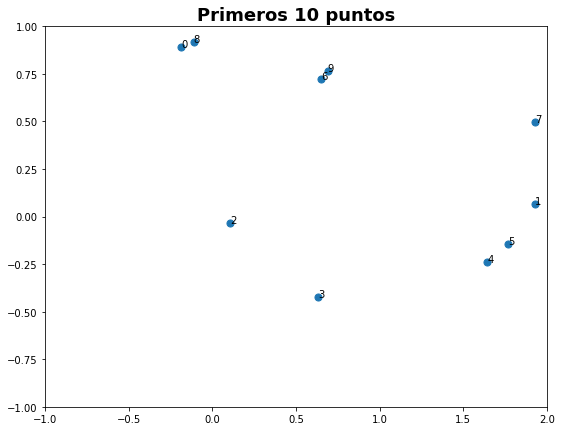

In [15]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Primeros 10 puntos', fontsize=18, fontweight='demi')
ax.set_xlim(-1, 2)
ax.set_ylim(-1,1)
ax.scatter(X_mn[:10, 0], X_mn[:10, 1],s=dot_size, cmap=cmap)
for i in range(10):
    ax.annotate(i, (X_mn[i,0],X_mn[i,1]))

A partir de estas dos se crea la matrix Laplaciana definida como $L = D-W$

In [16]:
from scipy.sparse import csgraph
L = csgraph.laplacian(W, normed=False)
L[:10,:10]

array([[15.92892587, -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.07974261, -0.        ],
       [-0.        , 14.2258575 , -0.        , -0.        , -0.        ,
        -0.26426576, -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , 12.14269773, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , 14.36002671, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , 14.18480081,
        -0.1552731 , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.26426576, -0.        , -0.        , -0.1552731 ,
        13.1505508 , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , 15.41357464, -0.        

El resto del proceso corresponde a un problema de valores y vectores propios sobre la matriz $L$.

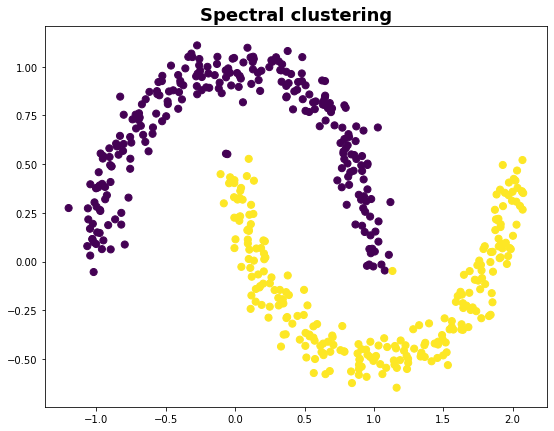

In [19]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, affinity='precomputed')
Ys = sc.fit_predict(W)  
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral clustering', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=Ys,s=dot_size, cmap=cmap)

### Ejercicio: Repetir el proceso usando una métrica de similitud basada en $k$-nn

In [20]:
from sklearn.neighbors import kneighbors_graph
W = kneighbors_graph(X_mn, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)

/home/julian/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/home/julian/.local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


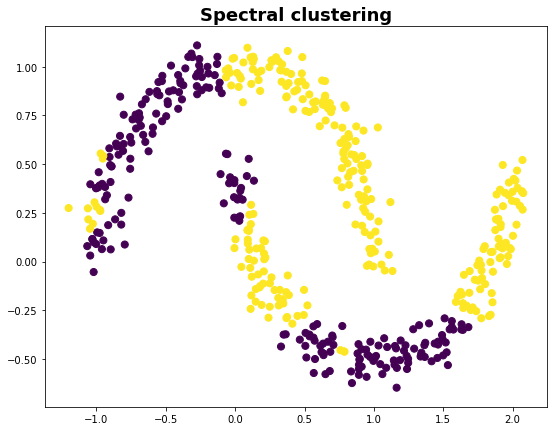

In [21]:
sc = SpectralClustering(2, affinity='precomputed')
Ys = sc.fit_predict(W)  
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral clustering', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=Ys,s=dot_size, cmap=cmap)

### El grafo debe ser simétrico y completamente conectado!!!